In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data.drop('Unnamed: 0', inplace = True, axis=1)

In [4]:
data.shape

(6019, 13)

In [5]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 변수 타입 설정

단위를 모두 제거하고 수치형 변수로 바꾸어 주었다.

In [6]:
data['Mileage'] = data['Mileage'].str.replace(" km/kg","")
data['Mileage'] = data['Mileage'].str.replace(" kmpl","")
data['Engine'] = data['Engine'].str.replace(" CC","")

data['Power'] = data['Power'].str.replace(" bhp","")
data['Power'] = data['Power'].apply(lambda x: None if x == "null" else x)
data['Power'] = data['Power'].apply(lambda x: None if x == "" else x)

data['Mileage'] = pd.to_numeric(data['Mileage'])
data['Engine'] = pd.to_numeric(data['Engine'])
data['Power'] = pd.to_numeric(data['Power'])

In [7]:
data["Company"] = data["Name"].str.split().str[0]
#data['Model'] = data["Name"].map(lambda x :" ".join(x.split()[1:]))

In [8]:
data.drop('Name', inplace = True, axis=1)

### 결측치 처리

- `New_Price` 값은 결측치가 너무 많아 제거 해주었다.

In [9]:
data.drop('New_Price', inplace = True, axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   float64
 7   Engine             5983 non-null   float64
 8   Power              5876 non-null   float64
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
 11  Company            6019 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [11]:
data[data['Engine'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
2074,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,3.15,Maruti
2096,Coimbatore,2004,52146,Petrol,Manual,First,0.00,NaN,NaN,NaN,1.93,Hyundai


In [12]:
data[data['Power'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
76,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,NaN,5.0,2.00,Ford
79,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,1.30,Hyundai
89,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,2.10,Hyundai
120,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,0.85,Hyundai
143,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,1.67,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,1.20,Hyundai
5893,Chennai,2008,51000,Petrol,Manual,Second,19.50,1061.0,NaN,NaN,1.75,Maruti
5925,Pune,2010,85000,Petrol,Manual,First,17.50,1798.0,NaN,5.0,2.85,Skoda
5943,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,NaN,6.0,1.70,Mahindra


In [13]:
data[data['Seats'].isnull()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,2.95,Honda
208,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,2.11,Maruti
229,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,3.60,Ford
733,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,1.75,Maruti
749,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,26.50,Land
1294,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,3.20,Honda
1327,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,5.80,Maruti
1385,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,1.50,Honda
1460,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,40.88,Land
1917,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,1.70,Honda


- Engine이나 Seats의 경우 해당 값이 null이면 Engine, Seats, Power 값이 null 인 경우가 많다. 따라서 해당 변수가 결측치인 경우 행을 삭제하였다. 

In [14]:
data = data.dropna(subset=['Engine'])
data = data.dropna(subset=['Seats'])

- Power의 값은 회사별 평균으로 계산하여 결측치를 처리하였다.

In [15]:
data = data.groupby('Company').apply(lambda x: x.fillna(x.mean()))

In [16]:
data

Location  Year  Kilometers_Driven Fuel_Type Transmission  \
Company                                                                       
Ambassador 1221     Chennai  2003              80000    Diesel       Manual   
Audi       4     Coimbatore  2013              40670    Diesel    Automatic   
           22        Mumbai  2015              55985    Petrol    Automatic   
           33       Kolkata  2010              35000    Diesel    Automatic   
           50         Kochi  2015              13648    Diesel    Automatic   
...                     ...   ...                ...       ...          ...   
Volvo      4429   Hyderabad  2012              86000    Diesel    Automatic   
           4497       Kochi  2014             102001    Diesel    Automatic   
           4788   Hyderabad  2015              38000    Diesel    Automatic   
           5583       Kochi  2014              93144    Diesel    Automatic   
           5762   Hyderabad  2014              51000    Diesel    Automatic   

                Owner_Type  Mileage  Engine   Power  Seats  Price     Company  
Company                                                                        
Ambassador 1221      Third    12.80  1489.0   35.50    5.0   1.35  Ambassador  
Audi       4        Second    15.20  1968.0  140.80    5.0  17.74        Audi  
           22        First    13.53  1984.0  177.01    5.0  23.50        Audi  
           33        First    12.40  2698.0  179.50    5.0  11.50        Audi  
           50        First    17.11  1968.0  174.33    5.0  21.43        Audi  
...                    ...      ...     ...     ...    ...    ...         ...  
Volvo      4429     Second    14.70  1985.0  163.00    5.0  18.25       Volvo  
           4497      First    11.10  2400.0  200.00    7.0  23.58       Volvo  
           4788     Second    16.80  1969.0  150.00    5.0  24.00       Volvo  
           5583      First    14.70  1984.0  181.00    5.0  17.15       Volvo  
           5762      First    27.03  1969.0  190.00    5.0  21.50       Volvo  

[5977 rows x 12 columns]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5977 entries, ('Ambassador', 1221) to ('Volvo', 5762)
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5977 non-null   object 
 1   Year               5977 non-null   int64  
 2   Kilometers_Driven  5977 non-null   int64  
 3   Fuel_Type          5977 non-null   object 
 4   Transmission       5977 non-null   object 
 5   Owner_Type         5977 non-null   object 
 6   Mileage            5977 non-null   float64
 7   Engine             5977 non-null   float64
 8   Power              5976 non-null   float64
 9   Seats              5977 non-null   float64
 10  Price              5977 non-null   float64
 11  Company            5977 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 624.9+ KB


- Power에 결측치 값이 아직도 하나가 남아있다.

In [18]:
data[data['Company']=="Smart"]

,,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
Company,,,,,,,,,,,,,
Smart,915,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,3.0,Smart


- 회사에 모델이 하나라 평균이 생성되지 않은 것으로 확인되었다. 해당 데이터는 삭제해주었다.

In [19]:
data = data.dropna()

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5976 entries, ('Ambassador', 1221) to ('Volvo', 5762)
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5976 non-null   object 
 1   Year               5976 non-null   int64  
 2   Kilometers_Driven  5976 non-null   int64  
 3   Fuel_Type          5976 non-null   object 
 4   Transmission       5976 non-null   object 
 5   Owner_Type         5976 non-null   object 
 6   Mileage            5976 non-null   float64
 7   Engine             5976 non-null   float64
 8   Power              5976 non-null   float64
 9   Seats              5976 non-null   float64
 10  Price              5976 non-null   float64
 11  Company            5976 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 624.8+ KB


### 데이터 타입 정리

**범주형 변수**: `Location`, `Year`, `Fuel_Type`, `Transmission`, `Owner_Type`, `Seats`, `Company`, `Model`

**수치형 변수**: `Kilometers_Driven`, `Mileage`, `Engine`, `Power`

**Target 변수**: `Price`

# Scaling

In [21]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5976.000000,5.976000e+03,5976.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,2013.387718,5.866299e+04,18.181289,1621.514558,113.072270,5.279284,9.503864
std,3.246541,9.154932e+04,4.515751,601.231100,53.699837,0.807794,11.204652
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.391150e+04,15.200000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.160000,1493.000000,94.000000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.967500
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


- Seats가 0인 데이터가 있는데, 이는 오류로 보여 제거해주겠음

In [22]:
data[data['Seats']==0]

,,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
Company,,,,,,,,,,,,,
Audi,3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,192.106043,0.0,18.0,Audi


In [23]:
data['Seats'] = data['Seats'].apply(lambda x: np.nan if x==0 else x)

In [24]:
data.dropna()

Location  Year  Kilometers_Driven Fuel_Type Transmission  \
Company                                                                       
Ambassador 1221     Chennai  2003              80000    Diesel       Manual   
Audi       4     Coimbatore  2013              40670    Diesel    Automatic   
           22        Mumbai  2015              55985    Petrol    Automatic   
           33       Kolkata  2010              35000    Diesel    Automatic   
           50         Kochi  2015              13648    Diesel    Automatic   
...                     ...   ...                ...       ...          ...   
Volvo      4429   Hyderabad  2012              86000    Diesel    Automatic   
           4497       Kochi  2014             102001    Diesel    Automatic   
           4788   Hyderabad  2015              38000    Diesel    Automatic   
           5583       Kochi  2014              93144    Diesel    Automatic   
           5762   Hyderabad  2014              51000    Diesel    Automatic   

                Owner_Type  Mileage  Engine   Power  Seats  Price     Company  
Company                                                                        
Ambassador 1221      Third    12.80  1489.0   35.50    5.0   1.35  Ambassador  
Audi       4        Second    15.20  1968.0  140.80    5.0  17.74        Audi  
           22        First    13.53  1984.0  177.01    5.0  23.50        Audi  
           33        First    12.40  2698.0  179.50    5.0  11.50        Audi  
           50        First    17.11  1968.0  174.33    5.0  21.43        Audi  
...                    ...      ...     ...     ...    ...    ...         ...  
Volvo      4429     Second    14.70  1985.0  163.00    5.0  18.25       Volvo  
           4497      First    11.10  2400.0  200.00    7.0  23.58       Volvo  
           4788     Second    16.80  1969.0  150.00    5.0  24.00       Volvo  
           5583      First    14.70  1984.0  181.00    5.0  17.15       Volvo  
           5762      First    27.03  1969.0  190.00    5.0  21.50       Volvo  

[5975 rows x 12 columns]

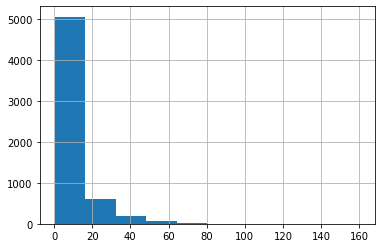

In [25]:
data['Price'].hist()

왼쪽으로 skewed 된 것을 확인할 수 있다.

In [26]:
data['log_price'] = np.log(data['Price'])

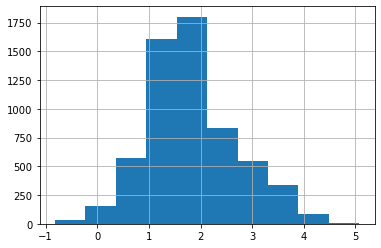

In [27]:
data['log_price'].hist()

In [28]:
data.drop('Price', inplace = True, axis=1)

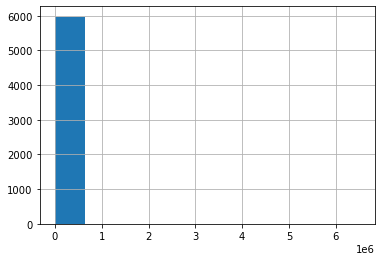

In [29]:
data['Kilometers_Driven'].hist()

- highly skewed 인 것을 확인할 수 있음

In [30]:
data['log_Kilometers_Driven'] = np.log(data['Kilometers_Driven'])

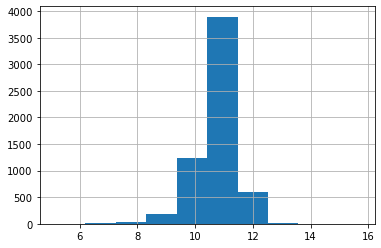

In [31]:
data['log_Kilometers_Driven'].hist()

In [32]:
data.drop('Kilometers_Driven', inplace = True, axis=1)

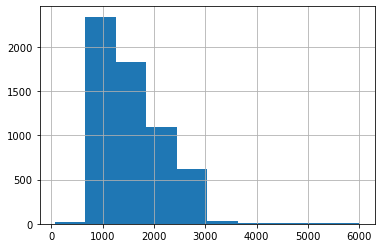

In [33]:
data['Engine'].hist()

- skewed 인 것을 확인할 수 있음

In [34]:
data['log_Engine'] = np.log(data['Engine'])

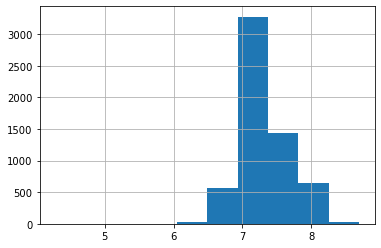

In [35]:
data['log_Engine'].hist()

In [36]:
data.drop('Engine', inplace = True, axis=1)

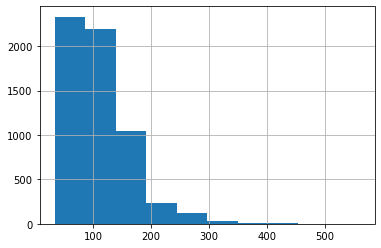

In [37]:
data['Power'].hist()

- skewed 인 것을 확인할 수 있음

In [38]:
data['log_Power'] = np.log(data['Power'])

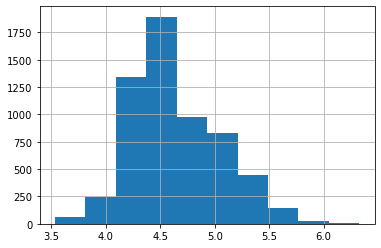

In [39]:
data['log_Power'].hist()

In [40]:
data.drop('Power', inplace = True, axis=1)

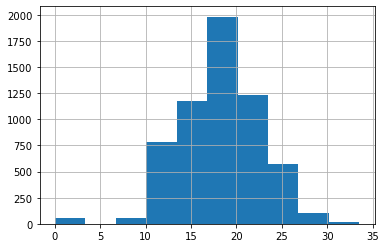

In [41]:
data['Mileage'].hist()

- 정규분포에 가까우므로 log 변환하지 않음

In [42]:
data.describe()

,Year,Mileage,Seats,log_price,log_Kilometers_Driven,log_Engine,log_Power
count,5976.000000,5976.000000,5975.000000,5976.000000,5976.000000,5976.000000,5976.000000
mean,2013.387718,18.181289,5.280167,1.828942,10.756777,7.331047,4.636604
std,3.246541,4.515751,0.804969,0.872456,0.716840,0.340182,0.414580
min,1998.000000,0.000000,2.000000,-0.820981,5.141664,4.276666,3.532226
25%,2012.000000,15.200000,5.000000,1.252763,10.431509,7.088409,4.317488
50%,2014.000000,18.160000,5.000000,1.731656,10.878047,7.308543,4.543295
75%,2016.000000,21.100000,5.000000,2.299329,11.198215,7.592870,4.927978
max,2019.000000,33.540000,10.000000,5.075174,15.687313,8.699181,6.327937


변수의 범위가 비슷함을 확인할 수 있음

### 범주형 변수 더미로 변환

In [43]:
Fuel_dummy = pd.get_dummies(data['Fuel_Type'], prefix='Fuel', drop_first=True)
Transmission_dummy = pd.get_dummies(data['Transmission'], prefix='Transmission', drop_first=True)
Owner_dummy = pd.get_dummies(data['Owner_Type'], prefix='Owner', drop_first=True)
Year_dummy = pd.get_dummies(data['Year'], prefix='Year', drop_first=True)
Seat_dummy = pd.get_dummies(data['Seats'], prefix='Seat', drop_first=True)
Company_dummy = pd.get_dummies(data['Company'], prefix='Company', drop_first=True)

In [44]:
data = pd.concat([data, Fuel_dummy, Transmission_dummy, Owner_dummy, Year_dummy, Seat_dummy, Company_dummy],axis=1)

In [45]:
data = data.drop(['Location','Fuel_Type', 'Transmission', 'Owner_Type', 'Year', 'Seats', 'Company'], axis=1)

In [46]:
num_feature = ['log_Kilometers_Driven', 'Mileage', 'log_Engine', 'log_Power', 'log_price']

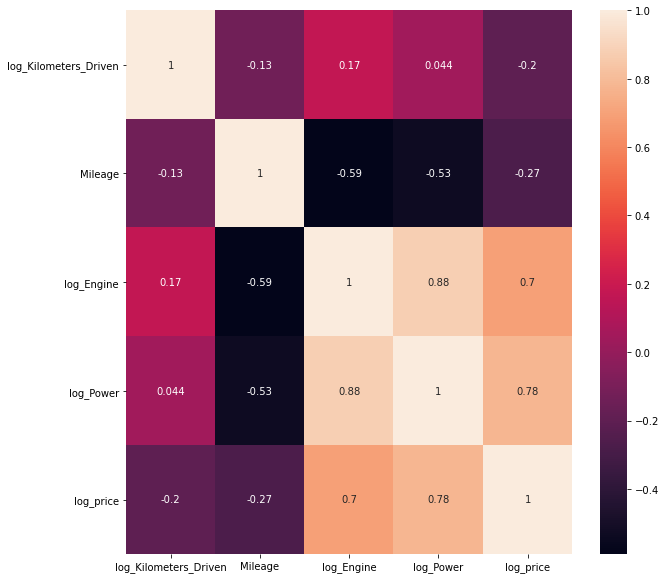

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(data = data[num_feature].corr(), annot=True)

- log_price와 log_power, log_engine의 상관관계가 높은 것을 확인할 수 있음

In [48]:
target = data["log_price"]
feature = data.drop(['log_price'], axis=1)

### OLS

In [49]:
print('원래 데이터의 크기: ', data.shape)
print('feature의 크기    : ', feature.shape)
print('target의 크기     : ', target.shape)

원래 데이터의 크기:  (5976, 70)
feature의 크기    :  (5976, 69)
target의 크기     :  (5976,)


In [50]:
from sklearn.model_selection import train_test_split
# 데이터를 train과 test로 분리
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

In [51]:
feature

Mileage  log_Kilometers_Driven  log_Engine  log_Power  \
Company                                                                  
Ambassador 1221    12.80              11.289782    7.305860   3.569533   
Audi       4       15.20              10.613246    7.584773   4.947340   
           22      13.53              10.932839    7.592870   5.176206   
           33      12.40              10.463103    7.900266   5.190175   
           50      17.11               9.521348    7.584773   5.160950   
...                  ...                    ...         ...        ...   
Volvo      4429    14.70              11.362103    7.593374   5.093750   
           4497    11.10              11.532738    7.783224   5.298317   
           4788    16.80              10.545341    7.585281   5.010635   
           5583    14.70              11.441902    7.592870   5.198497   
           5762    27.03              10.839581    7.585281   5.247024   

                 Fuel_Diesel  Fuel_Electric  Fuel_LPG  Fuel_Petrol  \
Company                                                              
Ambassador 1221            1              0         0            0   
Audi       4               1              0         0            0   
           22              0              0         0            1   
           33              1              0         0            0   
           50              1              0         0            0   
...                      ...            ...       ...          ...   
Volvo      4429            1              0         0            0   
           4497            1              0         0            0   
           4788            1              0         0            0   
           5583            1              0         0            0   
           5762            1              0         0            0   

                 Transmission_Manual  Owner_Fourth & Above  ...  Company_Mini  \
Company                                                     ...                 
Ambassador 1221                    1                     0  ...             0   
Audi       4                       0                     0  ...             0   
           22                      0                     0  ...             0   
           33                      0                     0  ...             0   
           50                      0                     0  ...             0   
...                              ...                   ...  ...           ...   
Volvo      4429                    0                     0  ...             0   
           4497                    0                     0  ...             0   
           4788                    0                     0  ...             0   
           5583                    0                     0  ...             0   
           5762                    0                     0  ...             0   

                 Company_Mitsubishi  Company_Nissan  Company_Porsche  \
Company                                                                
Ambassador 1221                   0               0                0   
Audi       4                      0               0                0   
           22                     0               0                0   
           33                     0               0                0   
           50                     0               0                0   
...                             ...             ...              ...   
Volvo      4429                   0               0                0   
           4497                   0               0                0   
           4788                   0               0                0   
           5583                   0               0                0   
           5762                   0               0                0   

                 Company_Renault  Company_Skoda  Company_Tata  Company_Toyota  \
Company                                                                

In [52]:
import statsmodels.api as sm

model = sm.OLS(target, feature)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              log_price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              5938.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:55:57   Log-Likelihood:                          9.8169
No. Observations:                5976   AIC:                                      118.4
Df Residuals:                    5907   BIC:                                      580.4
Df Model:                          69                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Mileage                  -0.0120      0.001     -9.824      0.000      -0.014      -0.010
log_Kilometers_Driven    -0.0492      0.006     -8.426      0.000      -0.061      -0.038
log_Engine                0.1554      0.028      5.652      0.000       0.102       0.209
log_Power                 0.7809      0.023     34.688      0.000       0.737       0.825
Fuel_Diesel               0.1537      0.034      4.579      0.000       0.088       0.220
Fuel_Electric             1.4740      0.179      8.229      0.000       1.123       1.825
Fuel_LPG                  0.0555      0.084      0.662      0.508      -0.109       0.220
Fuel_Petrol              -0.0861      0.034     -2.553      0.011      -0.152      -0.020
Transmission_Manual      -0.1228      0.011    -11.668      0.000      -0.143      -0.102
Owner_Fourth & Above      0.0132      0.088      0.151      0.880      -0.158       0.185
Owner_Second             -0.0512      0.009     -5.577      0.000      -0.069      -0.033
Owner_Third              -0.1423      0.025     -5.702      0.000      -0.191      -0.093
Year_1999                -0.3425      0.207     -1.657      0.098      -0.748       0.063
Year_2000                -0.0878      0.169     -0.520      0.603      -0.419       0.243
Year_2001                -0.4466      0.148     -3.023      0.003      -0.736      -0.157
Year_2002                -0.1459      0.132     -1.106      0.269      -0.405       0.113
Year_2003                -0.2544      0.128     -1.987      0.047      -0.505      -0.003
Year_2004                -0.0383      0.124     -0.310      0.757      -0.281       0.204
Year_2005                -0.1261      0.120     -1.054      0.292      -0.361       0.109
Year_2006                 0.2035      0.119      1.715      0.086      -0.029       0.436
Year_2007                 0.3391      0.117      2.894      0.004       0.109       0.569
Year_2008                 0.3990      0.117      3.414      0.001       0.170       0.628
Year_2009                 0.5092      0.117      4.369      0.000       0.281       0.738
Year_2010                 0.6362      0.116      5.482      0.000       0.409       0.864
Year_2011                 0.7571      0.116      6.535      0.000       0.530       0.984
Year_2012                 0.9077      0.116      7.846      0.000       0.681       1.135
Year_2013                 1.0264      0.116      8.875      0.000       0.800       1.253
Year_2014                 1.1514      0.116      9.961      0.000       0.925       1.378
Year_2015                 1.2807      0.116     11.073      0.000       1.054       1.507
Year_2016                 1.3927      0.116     12.044      0.000       1.166       1.619
Year_2017     

- $R^2$ 값이 0.986으로 모델의 설명력이 높은 것을 확인할 수 있었으며, F-통계량은 5938으로 모형이 통계적으로 유의미함을 확인할 수 있었다.
- P값을 살펴보았을 때, 수치형 변수의 경우 모두 통계적으로 유의미한 것을 확인할 수 있었고, Durbin-Watson 통계량도 2에 가까워 오차항이 독립성을 만족한다고 볼 수 있다.

### Linear Regression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

pred = model.predict(x_train)

모델의 절편과 회귀계수는 다음과 같다.

In [54]:
print(model.intercept_)
print(model.coef_)

-4.159496787040592
[-7.51063046e-03 -3.99567226e-02  3.31804479e-01  7.21936766e-01
  1.97491273e-01  1.79679886e+00  8.27012826e-02 -2.40844926e-03
 -1.23777366e-01  1.15654255e-01 -5.32801826e-02 -1.32131306e-01
  1.06755235e-01  3.95195252e-01 -1.36899211e-02  2.89854932e-01
  3.45955138e-01  3.93499012e-01  3.65875649e-01  6.03339366e-01
  7.69754879e-01  8.22638573e-01  9.35816601e-01  1.07627782e+00
  1.18375538e+00  1.35196299e+00  1.46127341e+00  1.58798544e+00
  1.71025094e+00  1.82803201e+00  1.96294160e+00  2.05093725e+00
  2.03450535e+00 -1.45557778e-01 -2.81791580e-01 -1.48421825e-01
 -1.27079962e-01 -7.06104275e-02 -3.66823115e-01  7.94915003e-02
  4.90315962e-02  1.82258239e-02  2.22044605e-15 -8.88944674e-01
 -9.30924664e-01 -8.39971134e-01 -7.19386359e-01 -6.04223838e-01
 -6.05517165e-01 -5.70055938e-01 -8.48678678e-01 -7.40373874e-01
  1.38723116e-01 -4.06015231e-01  2.88657986e-15  2.98061818e-01
 -8.02465759e-01 -5.23692135e-01  7.18453668e-02  2.90434016e-01
 -3.42

In [55]:
model_pred_train = model.predict(x_train)
model_pred_test = model.predict(x_test)

In [56]:
print('model train R-squared: ',model.score(x_train, y_train))
print('model test R-squared : ',model.score(x_test, y_test))
print('model train MSE      : ',mean_squared_error(y_train, model_pred_train))
print('model test MSE       : ',mean_squared_error(y_test, model_pred_test))

model train R-squared:  0.9229198525592103
model test R-squared :  0.9313260304464279
model train MSE      :  0.05851226855920711
model test MSE       :  0.05269429316510741


- $R^2$ 값이 0.922이므로 모델의 설명력이 높은 것을 알 수 있다.

- MSE 값이 작음을 확인할 수 있었다.

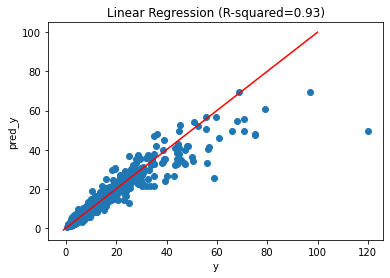

In [57]:
plt.scatter(np.exp(y_test), np.exp(model_pred_test))
plt.plot([-1, 100], [-1, 100], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Linear Regression (R-squared=0.93)')
plt.show()

### Ridge Regression

In [58]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10)
ridge.fit(x_train, y_train)

Ridge(alpha=10)

모델의 절편과 회귀계수는 다음과 같다.

In [59]:
print(ridge.intercept_)
print(ridge.coef_)

-3.089979385349119
[-4.40350776e-03 -8.10246136e-02  2.80835938e-01  8.18816142e-01
  1.21970696e-01  2.69697321e-01  4.11927933e-04 -1.08299431e-01
 -1.84901901e-01 -1.33192797e-02 -7.73164264e-02 -2.13517457e-01
 -1.63654730e-01 -1.60256876e-01 -4.33212127e-01 -3.97819606e-01
 -3.85200573e-01 -4.93408250e-01 -6.04391237e-01 -4.28307163e-01
 -3.19656715e-01 -2.83880867e-01 -1.88914964e-01 -6.52206771e-02
  3.09653374e-02  1.86232864e-01  2.84017901e-01  4.00430646e-01
  5.17549194e-01  6.16684472e-01  7.34547001e-01  7.79158076e-01
  7.00193605e-01 -1.72947881e-02 -1.55883664e-01 -1.04036495e-02
 -1.03525943e-02  3.70790880e-02 -3.31567755e-02  1.84713058e-02
  3.83408537e-01  3.38724584e-01  0.00000000e+00 -4.05178077e-01
 -2.45921188e-01 -2.72005042e-01 -6.49715885e-02 -1.46571559e-01
 -1.69525390e-01 -1.22564313e-01 -5.99856734e-02 -2.98751555e-02
  3.51726776e-01  1.60924321e-02  0.00000000e+00  5.64817301e-01
 -3.18003454e-01 -7.82193932e-02  4.10333699e-01  4.13633855e-01
  2.90

In [60]:
ridge_pred_train = ridge.predict(x_train)
ridge_pred_test = ridge.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error
print('Ridge train R-squared: ',ridge.score(x_train, y_train))
print('Ridge test R-squared : ',ridge.score(x_test, y_test))
print('Ridge train MSE      : ',mean_squared_error(y_train, ridge_pred_train))
print('Ridge test MSE       : ',mean_squared_error(y_test, ridge_pred_test))

Ridge train R-squared:  0.9145497085794297
Ridge test R-squared :  0.9199896917015937
Ridge train MSE      :  0.06486612397704165
Ridge test MSE       :  0.06139279073445591


- $R^2$ 값이 0.914이므로 모델의 설명력이 높은 것을 알 수 있다.

- MSE 값이 작음을 확인할 수 있었다.

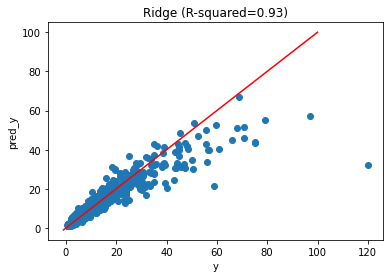

In [62]:
plt.scatter(np.exp(y_test), np.exp(ridge_pred_test))
plt.plot([-1, 100], [-1, 100], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Ridge (R-squared=0.93)')
plt.show()

### Lasso Regression

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

모델의 절편과 회귀계수는 다음과 같다.

In [64]:
print(lasso.intercept_)
print(lasso.coef_)

-3.3946494302842605
[-0.00452581 -0.07350308  0.22562217  0.89552345  0.10263608  0.
  0.         -0.12966556 -0.1832519  -0.         -0.06828488 -0.18718172
 -0.         -0.         -0.20092756 -0.14039016 -0.11066194 -0.32135849
 -0.45767039 -0.24502198 -0.12731909 -0.08880865 -0.          0.0933246
  0.19559808  0.35718275  0.46101261  0.57933889  0.7012132   0.79954826
  0.92312455  0.97913812  0.92408137  0.         -0.14664728  0.
 -0.          0.01772787 -0.          0.          0.45515413  0.40551694
  0.         -0.28587948 -0.         -0.05004424 -0.         -0.02312318
 -0.06462834 -0.01460416 -0.         -0.          0.38630545  0.
  0.          0.66650012 -0.19768824  0.02814748  0.48858441  0.46576538
  0.         -0.          0.0904982  -0.         -0.         -0.39179732
  0.14764851 -0.02030453  0.01077202]


In [65]:
lasso_pred_train = lasso.predict(x_train)
lasso_pred_test = lasso.predict(x_test)

In [66]:
from sklearn.metrics import mean_squared_error
print('lasso train R-squared: ',lasso.score(x_train, y_train))
print('lasso test R-squared : ',lasso.score(x_test, y_test))
print('lasso train MSE      : ',mean_squared_error(y_train, lasso_pred_train))
print('lasso test MSE       : ',mean_squared_error(y_test, lasso_pred_test))

lasso train R-squared:  0.9119271345839441
lasso test R-squared :  0.9180668462983586
lasso train MSE      :  0.0668569446881479
lasso test MSE       :  0.06286821118922095


- $R^2$ 값이 0.911이므로 모델의 설명력이 높은 것을 알 수 있다.

- MSE 값이 작음을 확인할 수 있었다.

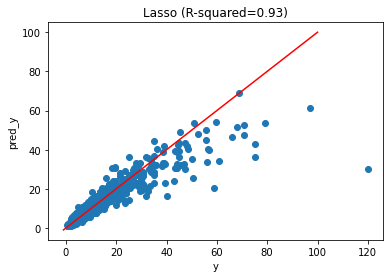

In [67]:
plt.scatter(np.exp(y_test), np.exp(lasso_pred_test))
plt.plot([-1, 100], [-1, 100], 'r')
plt.xlabel('y')
plt.ylabel('pred_y')
plt.title('Lasso (R-squared=0.93)')
plt.show()

### 모델 평가

In [68]:
print('model test R-squared : ',model.score(x_test, y_test))
print('model train MSE      : ',mean_squared_error(y_train, model_pred_train))

print('ridge test R-squared : ',ridge.score(x_test, y_test))
print('ridge train MSE      : ',mean_squared_error(y_train, ridge_pred_train))

print('lasso test R-squared : ',lasso.score(x_test, y_test))
print('lasso train MSE      : ',mean_squared_error(y_train, lasso_pred_train))

model test R-squared :  0.9313260304464279
model train MSE      :  0.05851226855920711
ridge test R-squared :  0.9199896917015937
ridge train MSE      :  0.06486612397704165
lasso test R-squared :  0.9180668462983586
lasso train MSE      :  0.0668569446881479


Linear Regression, Ridge, Lasso 순으로 모델의 성능이 좋다는 것을 확인할 수 있다.

### 회귀분석 가정 검토

**1. 설명변수와 종속변수 간 선형성**

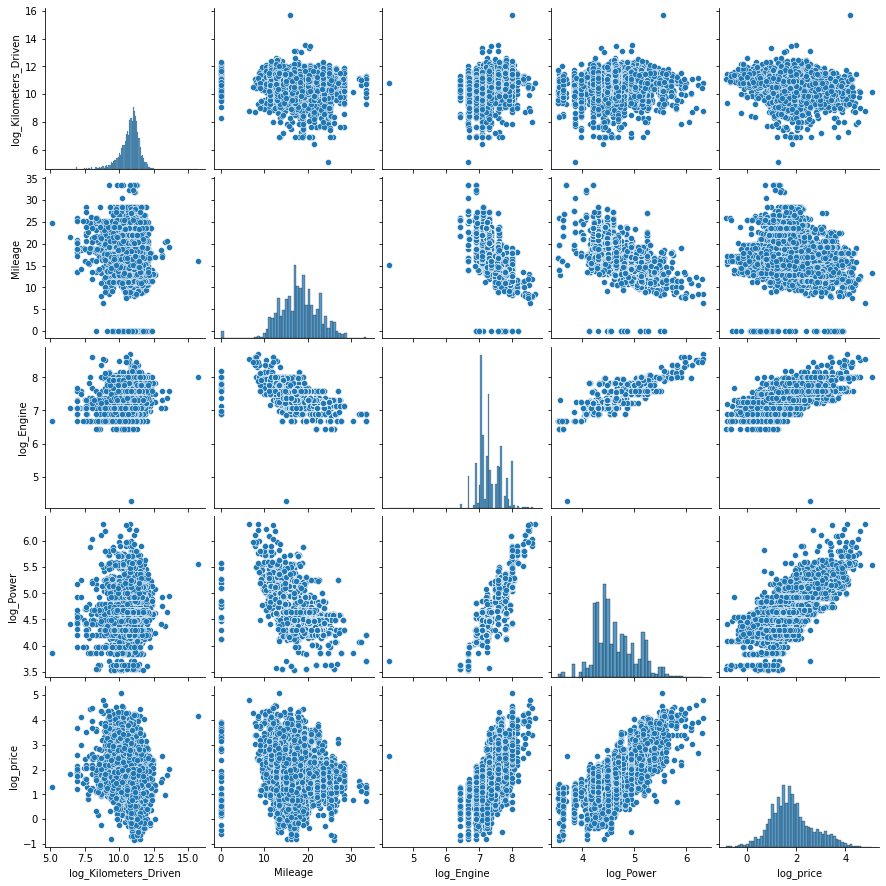

In [69]:
sns.pairplot(data[num_feature])

수치형 변수들만 보았을 때 서로 선형성이 존재함을 확인할 수 있다. 

**2. 잔차의 정규성**

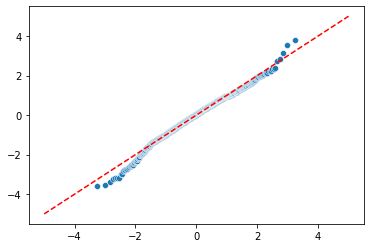

In [70]:
import scipy.stats

residual = y_test - model_pred_test

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

sns.scatterplot(x, y)
plt.plot([-5, 5], [-5, 5], '--', color='red')

정규성 가정을 만족하는 편이다.

**3. 잔차의 등분산성**

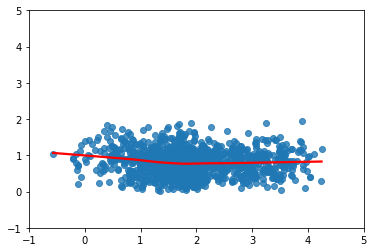

In [71]:
# 잔차의 등분산성 
sns.regplot(model_pred_test, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.show()

빨간 선이 직선에 가까운 것을 보아 등분산성을 어느정도 만족한다고 할 수 있다. 

**4. 다중공선성**

In [72]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
model = ols('log_price ~ log_Kilometers_Driven + Mileage + log_Engine + log_Power', data[num_feature])

res = model.fit()

pd.DataFrame({'feature': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')

,feature,VIF
0,log_Kilometers_Driven,1.092869
1,Mileage,1.537959
2,log_Engine,5.310140
3,log_Power,4.749498


다중공선성이 없음을 확인하였다.